<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selecting-the-dataset" data-toc-modified-id="Selecting-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selecting the dataset</a></span><ul class="toc-item"><li><span><a href="#Plot-chosen-dataset" data-toc-modified-id="Plot-chosen-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot chosen dataset</a></span></li></ul></li><li><span><a href="#Stationary-Test" data-toc-modified-id="Stationary-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stationary Test</a></span><ul class="toc-item"><li><span><a href="#ADF-Test-with-trend" data-toc-modified-id="ADF-Test-with-trend-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ADF Test with trend</a></span></li></ul></li><li><span><a href="#Mitigation-of-non-stationarity" data-toc-modified-id="Mitigation-of-non-stationarity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mitigation of non-stationarity</a></span><ul class="toc-item"><li><span><a href="#ADF-Test" data-toc-modified-id="ADF-Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ADF Test</a></span></li><li><span><a href="#KPSS-test" data-toc-modified-id="KPSS-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>KPSS test</a></span></li></ul></li><li><span><a href="#Parameter-selection-for-time-series-modeling" data-toc-modified-id="Parameter-selection-for-time-series-modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameter selection for time series modeling</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF-plots-of-the-chosen-datasets-(First-difference)" data-toc-modified-id="ACF-and-PACF-plots-of-the-chosen-datasets-(First-difference)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ACF and PACF plots of the chosen datasets (First difference)</a></span></li></ul></li><li><span><a href="#Modeling-the-series" data-toc-modified-id="Modeling-the-series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling the series</a></span><ul class="toc-item"><li><span><a href="#ARIMA(1,1,2)" data-toc-modified-id="ARIMA(1,1,2)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ARIMA(1,1,2)</a></span></li><li><span><a href="#Auto-ARIMA" data-toc-modified-id="Auto-ARIMA-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Auto-ARIMA</a></span><ul class="toc-item"><li><span><a href="#True-value-vs-fitted-value" data-toc-modified-id="True-value-vs-fitted-value-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>True value vs fitted value</a></span></li><li><span><a href="#Model-diagnostics" data-toc-modified-id="Model-diagnostics-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Model diagnostics</a></span></li></ul></li><li><span><a href="#Modeling-heteroskedasticity-in-residuals-with-GARCH" data-toc-modified-id="Modeling-heteroskedasticity-in-residuals-with-GARCH-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Modeling heteroskedasticity in residuals with GARCH</a></span><ul class="toc-item"><li><span><a href="#ACF-and-PACF-of-the-residuals-and-the-squares" data-toc-modified-id="ACF-and-PACF-of-the-residuals-and-the-squares-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>ACF and PACF of the residuals and the squares</a></span></li><li><span><a href="#GARCH-fit" data-toc-modified-id="GARCH-fit-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>GARCH fit</a></span></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Diagnostics</a></span><ul class="toc-item"><li><span><a href="#Legrange-Multiplier-test" data-toc-modified-id="Legrange-Multiplier-test-5.3.3.1"><span class="toc-item-num">5.3.3.1&nbsp;&nbsp;</span>Legrange Multiplier test</a></span></li><li><span><a href="#Conditional-SD-plot" data-toc-modified-id="Conditional-SD-plot-5.3.3.2"><span class="toc-item-num">5.3.3.2&nbsp;&nbsp;</span>Conditional SD plot</a></span></li><li><span><a href="#Students-T-QQ-Plot" data-toc-modified-id="Students-T-QQ-Plot-5.3.3.3"><span class="toc-item-num">5.3.3.3&nbsp;&nbsp;</span>Students-T QQ Plot</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Modeling non-stationarity

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from arch.unitroot import ADF, KPSS
from arch import arch_model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats
from pmdarima import auto_arima
import warnings
import sys

warnings.filterwarnings("ignore")
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper") 
params = {
    'legend.fontsize': 'medium',
    'axes.labelsize': 'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'axes.titlesize': 'large',
    'figure.figsize':(12,9)
}
plt.rcParams.update(params)

<div style="page-break-after: always;"></div>

## Selecting the dataset

Microsoft, Tesla and Bitcoin's closing prices with daily frequencies were chosen from 2020 to 2021.

In [2]:
dataset = yf.download(["MSFT", "TSLA", "BTC-USD"], start="2019-01-01", end="2022-01-01")["Adj Close"].dropna()
dataset.head()

[*********************100%***********************]  3 of 3 completed


,BTC-USD,MSFT,TSLA
Date,,,
2018-12-31,3742.700439,97.580017,22.186666
2019-01-02,3943.409424,97.147713,20.674667
2019-01-03,3836.741211,93.573822,20.024000
2019-01-04,3857.717529,97.925896,21.179333
2019-01-07,4025.248291,98.050781,22.330667


### Plot chosen dataset

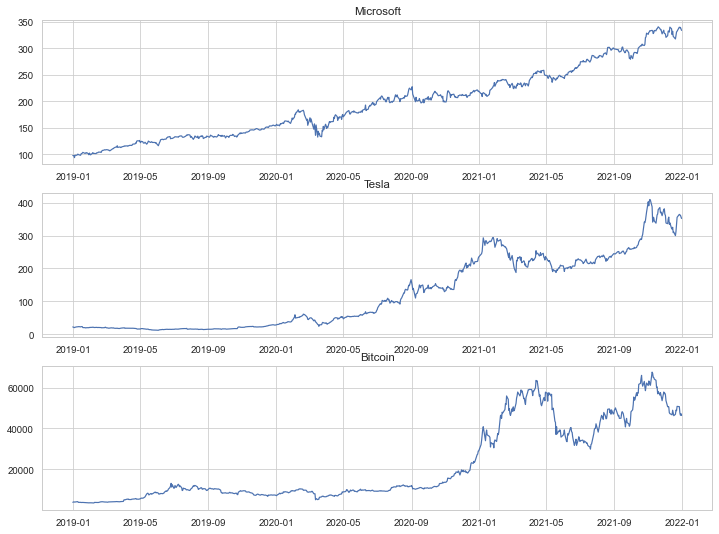

In [3]:
plt.subplot(3, 1, 1)
plt.plot(dataset['MSFT'])
plt.title('Microsoft')

plt.subplot(3, 1, 2)
plt.plot(dataset['TSLA'])
plt.title('Tesla')

plt.subplot(3, 1, 3)
plt.plot(dataset['BTC-USD'])
plt.title('Bitcoin');

We can realize that all item have trend. <br>
We can determine that ADF test will be executed with trend.

<div style="page-break-after: always;"></div>

## Stationary Test

### ADF Test with trend

In [25]:
microsoft_adf_with_trend = ADF(dataset['MSFT'], trend="ct")
tesla_adf_with_trend = ADF(dataset['TSLA'], trend="ct")
bitcoin_adf_with_trend = ADF(dataset['BTC-USD'], trend="ct")
print(f"Test statistics \n{microsoft_adf_with_trend.summary()}")
print(f"Test statistics \n{tesla_adf_with_trend.summary()}")
print(f"Test statistics \n{bitcoin_adf_with_trend.summary()}")

Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.655
P-value                         0.255
Lags                               16
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.296
P-value                         0.436
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.989
P-value                         0.608
Lags                               12
---------------

<div style="page-break-after: always;"></div>
### KPSS test

In [5]:
microsoft_kpss = KPSS(dataset['MSFT'])
tesla_kpss = KPSS(dataset['TSLA'])
bitcoin_kpss = KPSS(dataset['BTC-USD'])
print(microsoft_kpss.summary())
print(tesla_kpss.summary())
print(bitcoin_kpss.summary())

    KPSS Stationarity Test Results   
Test Statistic                  4.134
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  3.902
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  3.343
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypoth

We have conclude that all items cannot reject the null hypothesis that the process contains a unit root, which means all item are not stationary by ADF with trend and KPSS test.

## Mitigation of non-stationarity

In [6]:
diff_data = dataset.diff().dropna()
diff_data.head()

,BTC-USD,MSFT,TSLA
Date,,,
2019-01-02,200.708984,-0.432304,-1.511999
2019-01-03,-106.668213,-3.573891,-0.650667
2019-01-04,20.976318,4.352074,1.155333
2019-01-07,167.530762,0.124886,1.151335
2019-01-08,5.599609,0.710922,0.025999


<div style="page-break-after: always;"></div>

### ADF Test

In [7]:
diff_microsoft_adf_with_trend = ADF(diff_data['MSFT'], trend="ct")
diff_tesla_adf_with_trend = ADF(diff_data['TSLA'], trend="ct")
diff_bitcoin_adf_with_trend = ADF(diff_data['BTC-USD'], trend="ct")
print(f"Test statistics \n{diff_microsoft_adf_with_trend.summary()}")
print(f"Test statistics \n{diff_tesla_adf_with_trend.summary()}")
print(f"Test statistics \n{diff_bitcoin_adf_with_trend.summary()}")

Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                 -8.128
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                -27.683
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.42 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Test statistics 
   Augmented Dickey-Fuller Results   
Test Statistic                 -8.025
P-value                         0.000
Lags                               11
---------------

### KPSS test

In [8]:
diff_microsoft_kpss = KPSS(diff_data['MSFT'])
diff_tesla_kpss = KPSS(diff_data['TSLA'])
diff_bitcoin_kpss = KPSS(diff_data['BTC-USD'])
print(diff_microsoft_kpss.summary())
print(diff_tesla_kpss.summary())
print(diff_bitcoin_kpss.summary())

    KPSS Stationarity Test Results   
Test Statistic                  0.099
P-value                         0.589
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.182
P-value                         0.306
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.091
P-value                         0.633
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypoth

<div style="page-break-after: always;"></div>

The null-hypothesis, that the process is stationary cannot be rejected.

The above tests suggests that a difference component should be added to the model.

## Parameter selection for time series modeling

### ACF and PACF plots of the chosen datasets (First difference)

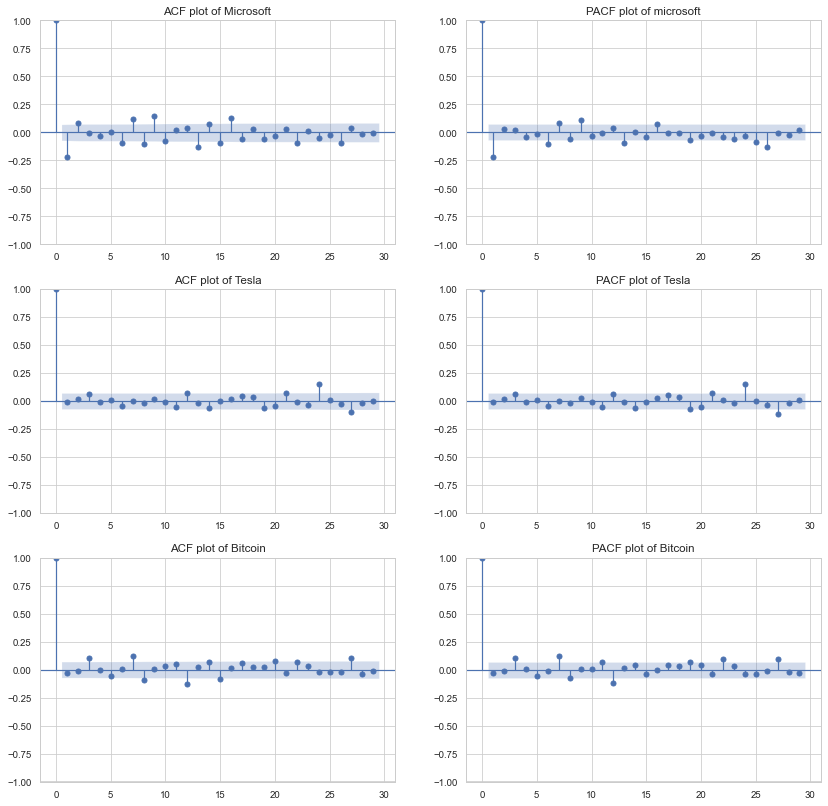

In [9]:
fig, ax = plt.subplots(3,2, figsize=(14,14))

plot_acf(diff_data["MSFT"], ax=ax[0][0], title="ACF plot of Microsoft")
plot_pacf(diff_data["MSFT"], ax=ax[0][1], method="ywm", title="PACF plot of microsoft");
plot_acf(diff_data["TSLA"], ax=ax[1][0], title="ACF plot of Tesla")
plot_pacf(diff_data["TSLA"], ax=ax[1][1], method="ywm", title="PACF plot of Tesla");
plot_acf(diff_data["BTC-USD"], ax=ax[2][0], title="ACF plot of Bitcoin")
plot_pacf(diff_data["BTC-USD"], ax=ax[2][1], method="ywm", title="PACF plot of Bitcoin");

We have concluded to choose Microsoft prices as the ACF and PACF plot clearly shows that Tesla and Bitcoin does not have any significant ARMA component that can be modeled. <br>

**Microsoft** <br>
Lag(1) is significant in both the ACF and PACF plots. 

An AR(1) component and MA(1) component exists, which are both negative.

MA(2) is positive and significant.

There are some seasonal components on 7<sup>th</sup> and 9<sup>th</sup> lags

<div style="page-break-after: always;"></div>

## Modeling the series

From the above inferences, we can use an ARIMA(1,1,2) for Microsoft as initial parameters to model the time-series.

### ARIMA(1,1,2)

In [10]:
arima_112 = SARIMAX(dataset['MSFT'], order=(1,1,2)).fit()

In [11]:
print(arima_112.summary())

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                  758
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2009.475
Date:                Tue, 04 Oct 2022   AIC                           4026.950
Time:                        15:44:56   BIC                           4045.467
Sample:                             0   HQIC                          4034.082
                                - 758                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0363      0.287     -0.127      0.899      -0.598       0.526
ma.L1         -0.1692      0.283     -0.597      0.550      -0.724       0.386
ma.L2          0.0896      0.064      1.402      0.1

From the summary, no coefficient rejects the null hypothesis. So, the initial ARIMA parameters needs to be modified for a better fit.

<br></br>

### Auto-ARIMA

auto_arima module from pmdarima selects the parameters that minimizes the selected information criterion (AIC in our case).

In [12]:
auto_model = auto_arima(
    dataset["MSFT"], 
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=3,
    max_d=3,
    max_q=3,
    trace=True,
    with_intercept=False,
    return_valid_fits=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4058.795, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4025.207, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4029.518, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4025.709, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4026.097, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4027.428, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4017.841, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4054.831, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4019.060, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4019.203, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4021.803, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4020.985, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.750 seconds


<div style="page-break-after: always;"></div>

Now that we have found ARIMA(1,1,0) minimizes the AIC criterion, we can use the parameters to fit an ARIMA model and diagnose the coefficients

In [13]:
arima_110 = SARIMAX(dataset['MSFT'], order=(1,1,0)).fit()

In [14]:
print(arima_110.summary())

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                  758
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2010.603
Date:                Tue, 04 Oct 2022   AIC                           4025.207
Time:                        15:44:57   BIC                           4034.465
Sample:                             0   HQIC                          4028.773
                                - 758                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2143      0.021    -10.268      0.000      -0.255      -0.173
sigma2        11.8709      0.377     31.504      0.000      11.132      12.609
Ljung-Box (L1) (Q):                   0.01   Jarque-

#### True value vs fitted value

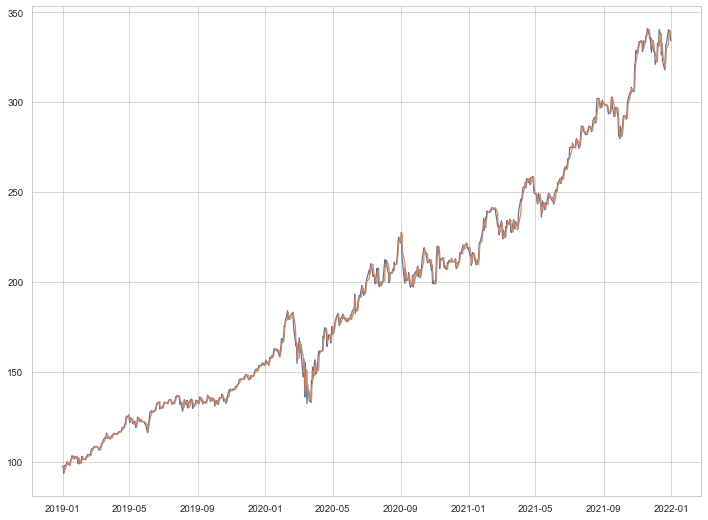

In [15]:
plt.plot(dataset['MSFT'])
plt.plot(arima_110.fittedvalues[1:])

<div style="page-break-after: always;"></div>

#### Model diagnostics

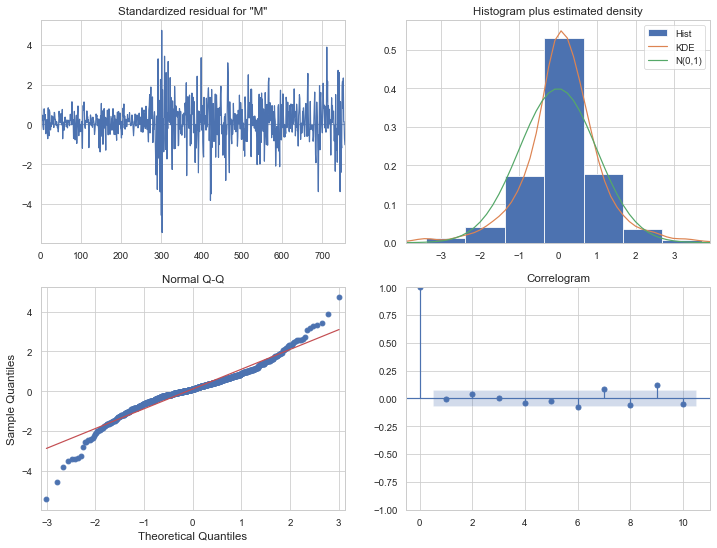

In [16]:
arima_110.plot_diagnostics();

### Modeling heteroskedasticity in residuals with GARCH

The residual plot shows clear heteroskedasticity, which suggests GARCH effects.

Also, the distribution is leptokurtic. So, a students-T distribution can be used for the GARCH model.

#### ACF and PACF of the residuals and the squares

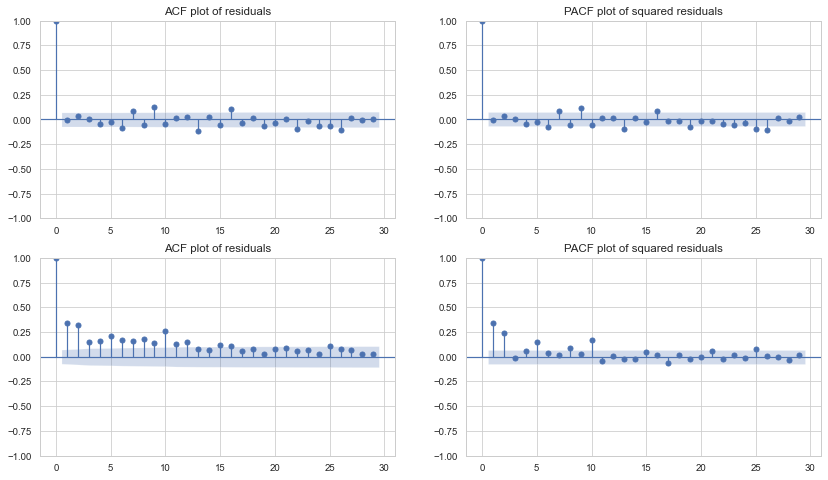

In [17]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

plot_acf(arima_110.resid[1:], ax=ax[0][0], title="ACF plot of residuals")
plot_pacf(arima_110.resid[1:], ax=ax[0][1], method="ywm", title="PACF plot of squared residuals");
plot_acf(arima_110.resid[1:] ** 2, ax=ax[1][0], title="ACF plot of residuals")
plot_pacf(arima_110.resid[1:] ** 2, ax=ax[1][1], method="ywm", title="PACF plot of squared residuals");

<div style="page-break-after: always;"></div>

#### GARCH fit
Let's begin with a GARCH(2,1) model.

In [18]:
garch_21 = arch_model(arima_110.resid[1:], mean="constant", p=2, q=1, dist="studentsT").fit(update_freq=5)

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1844.998766359014
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1844.580363372783
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1844.5802009055478
            Iterations: 12
            Function evaluations: 94
            Gradient evaluations: 12


In [19]:
print(garch_21.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1844.58
Distribution:      Standardized Student's t   AIC:                           3701.16
Method:                  Maximum Likelihood   BIC:                           3728.94
                                              No. Observations:                  757
Date:                      Tue, Oct 04 2022   Df Residuals:                      756
Time:                              15:44:58   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0

All the coefficients are statistically significant.

<br></br>

#### Diagnostics

##### Legrange Multiplier test

In [20]:
# ARCH LM test for conditional heteroskedasticity
print("\nARCH LM test for conditional heteroskedasticity")
print(garch_21.arch_lm_test(standardized=True))


ARCH LM test for conditional heteroskedasticity
ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 9.6122
P-value: 0.9747
Distributed: chi2(20)


<div style="page-break-after: always;"></div>

##### Conditional SD plot

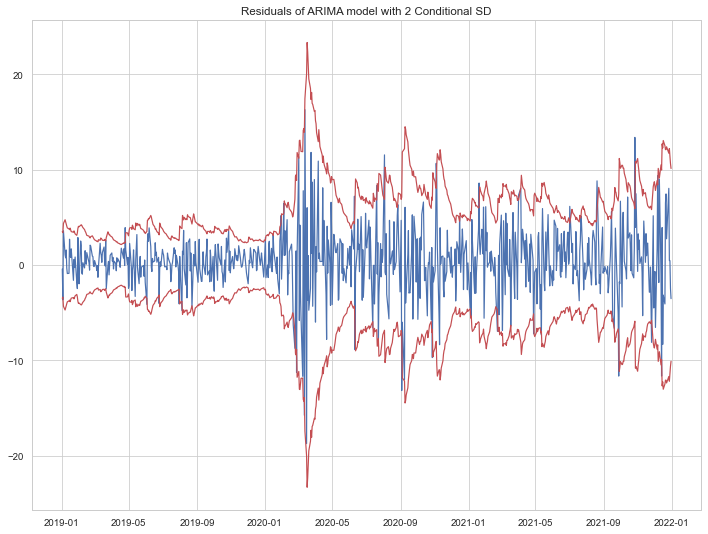

In [21]:
plt.plot(arima_110.resid[1:])
plt.plot(2*garch_21.conditional_volatility, c="r")
plt.plot(-2*garch_21.conditional_volatility, c="r")
plt.title("Residuals of ARIMA model with 2 Conditional SD");

##### Students-T QQ Plot

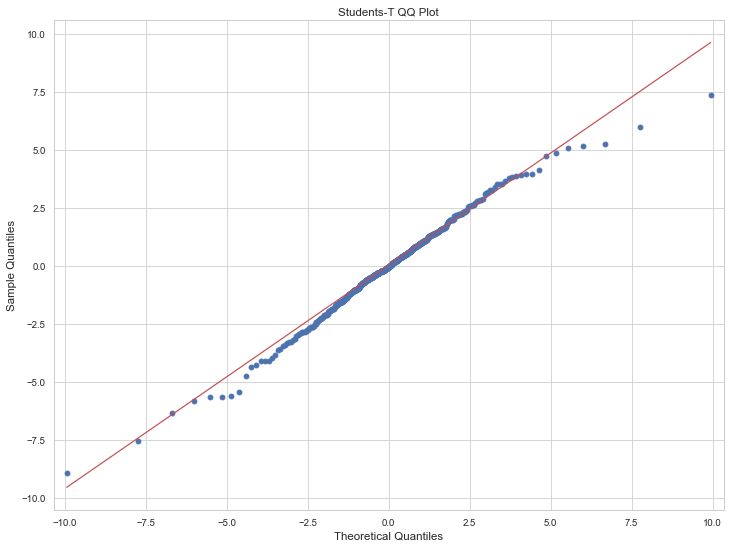

In [22]:
sm.qqplot(garch_21.resid, stats.t, fit=True, line="q")
plt.title("Students-T QQ Plot");